In [87]:
import cv2
import numpy as np
from PIL import Image

rows = 512
cols = 640

# img = np.fromfile(r'/Users/dale/Downloads/raw_file/guoda.raw', dtype="<u2")
img = np.fromfile(r'/Volumes/Untitled 1/dataset_0121/face_dataset/27/0-0.raw', dtype="<u2")
channels = int(img.shape[0]/512/640)
print(channels)

img = img.reshape(rows, cols, channels)
all_images = np.split(img, channels, axis=2)
count = 0
for img_item in all_images:
    if(count % 2 == 0):
        print(img_item.shape)
#         im = Image.fromarray(img_item)
#         im.save("/Users/dale/Downloads/raw_file/"+str(count)+".jpg")
        print(img_item.shape)
        cv2.imwrite("/Users/dale/Downloads/raw_file/"+str(count)+".png", img_item)
    
    break
    count += 1

1
(512, 640, 1)
(512, 640, 1)


In [103]:
import cv2
import numpy as np
from PIL import Image

rows = 512
cols = 640

with open('/Users/dale/Downloads/dataset_0127/IR/raw_list.txt', 'r') as f:
    lines = f.readlines()

count = 0
for line in lines:
    raw_path = line.strip()
    
    img = np.fromfile(raw_path, dtype="<u2")
    channels = int(img.shape[0]/512/640)
    count += channels
    print(channels)
print("count: ", count)

703
612
451
488
614
503
369
555
498
560
419
466
531
453
395
422
502
402
402
453
count:  9798


In [ ]:
# 468
#621
#560
#728
#486
#747
761
528
595
470
537
522
492
650
851
587
669
605
469
662

In [22]:
from PIL import Image

rawData = open("/Volumes/Untitled 1/dataset_0121/face_dataset/27/0-0.raw", 'rb').read()
imgSize = (512,640, 341)# the image size
img = Image.frombytes('L', imgSize, rawData)
img.save("/Users/dale/Downloads/raw_file/000.jpg")# can give any format you like .png

ValueError: Size must be a tuple of length 2

In [73]:
import cv2
from PIL import Image

# img = cv2.imread("/Users/dale/Downloads/raw_file/0.png")
img = Image.open("/Users/dale/Downloads/raw_file/0.png")
print(img.size)
print(img)
img = numpy.asarray(img)
print(img.size)
print(img)

(640, 512)
<PIL.PngImagePlugin.PngImageFile image mode=I size=640x512 at 0x7FF49C715FA0>
327680
[[14518     2  5000 ...  6814  6809  6815]
 [ 6807  6797  6804 ...  6809  6812  6810]
 [ 6803  6802  6808 ...  6812  6811  6809]
 ...
 [ 6794  6798  6789 ...  6805  6812  6802]
 [ 6786  6789  6797 ...  6812  6807  6810]
 [ 6795  6789  6797 ...  6808  6808  6827]]


In [59]:
import cv2
img = cv2.imread("/Users/dale/Downloads/raw_file/0.png")

from skimage import exposure
# Equalization
img_eq = exposure.equalize_hist(img)

cv2.imwrite("/Users/dale/Downloads/raw_file/0-1.png", img_eq)


True

In [98]:
import cv2 as cv 

img = cv2.imread("/Users/dale/Downloads/raw_file/0.png", -1)

uint16_img = img
uint16_img -= uint16_img.min()
uint16_img = uint16_img / (uint16_img.max() - uint16_img.min())
uint16_img *= 255
new_uint16_img = uint16_img.astype(np.uint8)

img = new_uint16_img
print(img)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)
# clahe_img = cv.merge((clahe_B,clahe_G,clahe_R))
print(img)
cv2.imwrite("/Users/dale/Downloads/raw_file/0-1.png", clahe_img)


[[225   0  77 ... 106 105 106]
 [105 105 105 ... 105 106 105]
 [105 105 105 ... 106 106 105]
 ...
 [105 105 105 ... 105 106 105]
 [105 105 105 ... 106 105 105]
 [105 105 105 ... 105 105 106]]
[[225   0  77 ... 106 105 106]
 [105 105 105 ... 105 106 105]
 [105 105 105 ... 106 106 105]
 ...
 [105 105 105 ... 105 106 105]
 [105 105 105 ... 106 105 105]
 [105 105 105 ... 105 105 106]]


True

In [121]:
import os

fps = 30
list_file = "/Users/dale/Downloads/dataset_0127/VIS_avi_list.txt"
with open(list_file,'r') as f:
    lines = f.readlines()
for line in lines:
    filename = line.strip()
    print(filename)
    save_id = filename.split('-')[0].split('/')[-1]
    save_dir = filename.split('-')[0].replace("VIS", "VIS_images")
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    videoCapture = cv2.VideoCapture(filename)
#     print(videoCapture.isOpened())
    count = 0
    while True:
        success, frame = videoCapture.read()
#         print(success)
#         print(count)
        if success:
            save_path = save_dir + '/' + str(save_id) + '-' + str(count) + '.jpg'
#             print(save_path)
            cv2.imwrite(save_path ,frame)
            count += 1
        else:
            break

/Users/dale/Downloads/dataset_0127/VIS/0-1.avi
/Users/dale/Downloads/dataset_0127/VIS/1-1.avi
/Users/dale/Downloads/dataset_0127/VIS/9-1.avi
/Users/dale/Downloads/dataset_0127/VIS/14-1.avi
/Users/dale/Downloads/dataset_0127/VIS/15-1.avi
/Users/dale/Downloads/dataset_0127/VIS/18-1.avi
/Users/dale/Downloads/dataset_0127/VIS/19-1.avi
/Users/dale/Downloads/dataset_0127/VIS/20-1.avi
/Users/dale/Downloads/dataset_0127/VIS/21-1.avi
/Users/dale/Downloads/dataset_0127/VIS/22-1.avi
/Users/dale/Downloads/dataset_0127/VIS/23-1.avi
/Users/dale/Downloads/dataset_0127/VIS/24-1.avi
/Users/dale/Downloads/dataset_0127/VIS/25-1.avi
/Users/dale/Downloads/dataset_0127/VIS/28-1.avi
/Users/dale/Downloads/dataset_0127/VIS/29-1.avi
/Users/dale/Downloads/dataset_0127/VIS/30-1.avi
/Users/dale/Downloads/dataset_0127/VIS/31-1.avi
/Users/dale/Downloads/dataset_0127/VIS/32-1.avi
/Users/dale/Downloads/dataset_0127/VIS/33-1.avi
/Users/dale/Downloads/dataset_0127/VIS/34-1.avi


In [4]:
import os
import cv2

fps = 30
# list_file = "H:/BaiduNetdiskDownload/1000红外人像/all_vis_avi_list.txt"
# list_file = "H:/BaiduNetdiskDownload/1000红外人像/all_vis_list_20210423.txt"
# list_file = "H:/BaiduNetdiskDownload/1000红外人像/all_vis_list_20210518.txt"
list_file = "H:/BaiduNetdiskDownload/1000红外人像/

.txt"


with open(list_file,'r') as f:
    lines = f.readlines()
for line in lines:
    filename = line.strip()
    print(filename)
    save_id = filename.split('/')[4]
    save_dir = filename.replace("1000红外人像", "1000-dataset_images/VIS_images").split('2021')[0] + save_id + "/"
    print(save_dir)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    videoCapture = cv2.VideoCapture(filename)
#     print(videoCapture.isOpened())
    count = 0
    while True:
        success, frame = videoCapture.read()
#         print(success)
#         print(count)
        if success:
            save_path = save_dir + '/' + str(save_id) + '-' + str(count) + '.jpg'
#             print(save_path)
            cv2.imwrite(save_path ,frame)
            count += 1
        else:
            break

H:/BaiduNetdiskDownload/1000红外人像/20210523/433/433-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/433/
H:/BaiduNetdiskDownload/1000红外人像/20210523/434/434-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/434/
H:/BaiduNetdiskDownload/1000红外人像/20210523/435/435-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/435/
H:/BaiduNetdiskDownload/1000红外人像/20210523/436/436-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/436/
H:/BaiduNetdiskDownload/1000红外人像/20210523/437/437-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/437/
H:/BaiduNetdiskDownload/1000红外人像/20210523/438/438-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/438/
H:/BaiduNetdiskDownload/1000红外人像/20210523/439/439-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/439/
H:/BaiduNetdiskDownload/1000红外人像/20210523/440/440-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/440/
H:/BaiduNetdiskDownload/1000红外人像/20210523/441/441-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_imag

H:/BaiduNetdiskDownload/1000红外人像/20210523/507/507-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/507/
H:/BaiduNetdiskDownload/1000红外人像/20210523/508/508-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/508/
H:/BaiduNetdiskDownload/1000红外人像/20210523/509/509-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/509/
H:/BaiduNetdiskDownload/1000红外人像/20210523/510/510-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/510/
H:/BaiduNetdiskDownload/1000红外人像/20210523/511/511-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/511/
H:/BaiduNetdiskDownload/1000红外人像/20210523/512/512-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/512/
H:/BaiduNetdiskDownload/1000红外人像/20210523/513/513-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/513/
H:/BaiduNetdiskDownload/1000红外人像/20210523/514/514-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_images/514/
H:/BaiduNetdiskDownload/1000红外人像/20210523/515/515-7
H:/BaiduNetdiskDownload/1000-dataset_images/VIS_imag

(512, 640, 3)
(614, 512, 3)


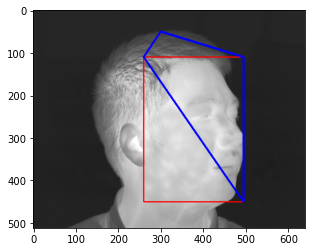

In [152]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("/Users/dale/Downloads/dataset_0127/IR_p_images/0/0-1-00000067.bmp")
img_resize = cv2.resize(img, (int(640*0.8), int(512*1.2)), interpolation = cv2.INTER_AREA)

img_draw = cv2.rectangle(img, (260, 110), (495, 450), (255, 0, 0), 2)
img_draw_resize = cv2.rectangle(img_resize, (int(260*0.8), int(110*1.2)), (int(495*0.8), int(450*1.2)), (255, 0, 0), 2)

points = np.array([[[260,110],[300,50],[495,110],[495,450]]])
img_deaw_polygon = cv2.polylines(img, [points], True, (0,0,255), 3)

print(img.shape)
print(img_resize.shape)

# plt.subplot(2,1,1)
plt.imshow(img)

# plt.subplot(2,1,2)
plt.imshow(img_resize)
plt.imshow(img_deaw_polygon)